In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
import numpy as np

In [25]:
X = np.random.standard_normal(30* 500).reshape(30, 500)

In [7]:
y = np.random.standard_normal(30) > 0

In [5]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [22]:
Xp = SelectKBest(mutual_info_classif, k=5).fit_transform(X, y)

In [9]:
Xp.shape

(30, 5)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
cv_result = cross_val_score(DecisionTreeClassifier(max_depth=5), Xp, y, cv=10)

In [14]:
cv_result.mean()

0.59999999999999998

In [15]:
depths = range(1, 10)

In [23]:
scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), Xp, y, cv=10) for d in depths]

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

<Container object of 3 artists>

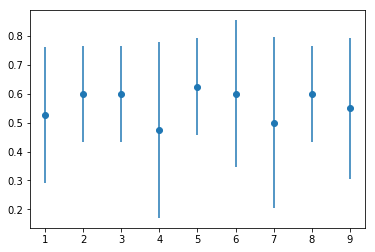

In [24]:
plt.errorbar(depths, [s.mean() for s in scores], yerr=[s.std() for s in scores], fmt='o')

# Pipelines

In [26]:
from sklearn.pipeline import Pipeline as SkPipeline

In [29]:
correct_scores = []
feature_selector = SelectKBest(mutual_info_classif, k=5)
model = DecisionTreeClassifier()
pipeline = SkPipeline([('f_select', feature_selector),
                       ('tree', model)])
for d in depths:
    pipeline.set_params(tree__max_depth=d)
    correct_scores.append(cross_val_score(pipeline, X, y, cv=5, n_jobs=4))

<Container object of 3 artists>

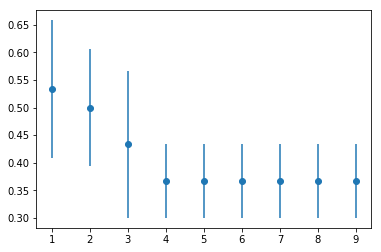

In [30]:
plt.errorbar(depths, [s.mean() for s in correct_scores], yerr=[s.std() for s in correct_scores], fmt='o')

# Spam Data

In [31]:
import pandas as pd
import re

In [33]:
print open('data/spambase/spambase.names').read()

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [34]:
names = re.findall('^(.+):', open('data/spambase/spambase.names').read(), re.MULTILINE)

In [35]:
names

['| UCI Machine Learning Repository: http',
 'word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char

In [36]:
del names[0]

In [37]:
names.append('label')

In [38]:
spam_data = pd.read_csv('data/spambase/spambase.data', names=names)

In [39]:
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [40]:
X, y = spam_data.drop('label', axis=1), spam_data.label

In [41]:
scores = [cross_val_score(DecisionTreeClassifier(max_depth=d), X, y) for d in depths]

<Container object of 3 artists>

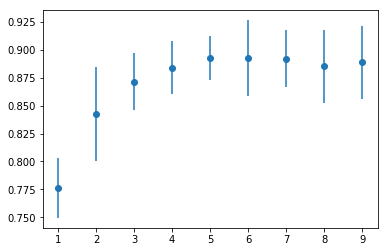

In [42]:
plt.errorbar(depths, [s.mean() for s in scores], yerr=[s.std() for s in scores], fmt='o')

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
def cv_spam(models):
    scores = [cross_val_score(model, X, y) for model in models]
    means, sds = [[f(s) for s in scores] for f in (np.mean, np.std)]
    return means, sds

In [51]:
depths = range(2, 22, 2)
mean_tree, sd_tree = cv_spam([DecisionTreeClassifier(max_depth=d) for d in depths])
mean_bag, sd_bag = cv_spam([BaggingClassifier(DecisionTreeClassifier(max_depth=d), n_estimators=20, n_jobs=4)
                            for d in depths])

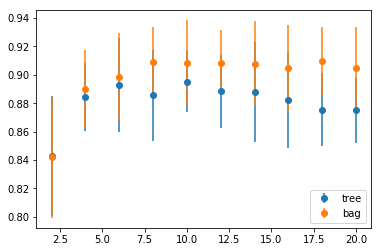

In [52]:
plt.errorbar(depths, mean_tree, yerr=sd_tree, label='tree', fmt='o')
plt.errorbar(depths, mean_bag, yerr=sd_bag, label='bag', fmt='o')
plt.legend(loc='lower right')

# Automatic Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
gs_model = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depths})

In [55]:
gs_fit = gs_model.fit(X, y)

In [56]:
gs_fit.cv_results_

{'mean_fit_time': array([ 0.01321371,  0.01958895,  0.02675931,  0.03319224,  0.03937761,
         0.04519741,  0.05006337,  0.05391407,  0.05722674,  0.05940135]),
 'mean_score_time': array([ 0.00059803,  0.00063237,  0.00063944,  0.00064739,  0.00069475,
         0.00087786,  0.00098165,  0.00097338,  0.00100692,  0.00099866]),
 'mean_test_score': array([ 0.8426429 ,  0.88372093,  0.89241469,  0.8865464 ,  0.89306672,
         0.88893719,  0.89132797,  0.88415562,  0.8756792 ,  0.87415779]),
 'mean_train_score': array([ 0.86991985,  0.91512723,  0.94099073,  0.95892147,  0.96935399,
         0.97826571,  0.98348268,  0.98772117,  0.99141578,  0.99380647]),
 'param_max_depth': masked_array(data = [2 4 6 8 10 12 14 16 18 20],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': ({'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 14},
  

<Container object of 3 artists>

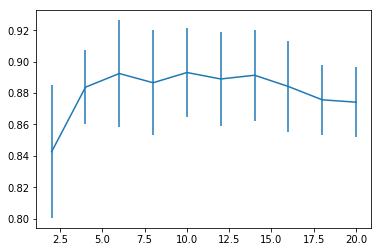

In [57]:
plt.errorbar(depths, gs_fit.cv_results_['mean_test_score'], yerr=gs_fit.cv_results_['std_test_score'])